![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [29]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [30]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


In [31]:
penguins_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,332.000000,332.000000,332.000000,332.000000
mean,44.021084,17.153012,200.975904,4206.475904
std,5.452462,1.960275,14.035971,806.361278
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.700000,17.300000,197.000000,4025.000000
75%,48.625000,18.700000,213.000000,4781.250000
max,59.600000,21.500000,231.000000,6300.000000


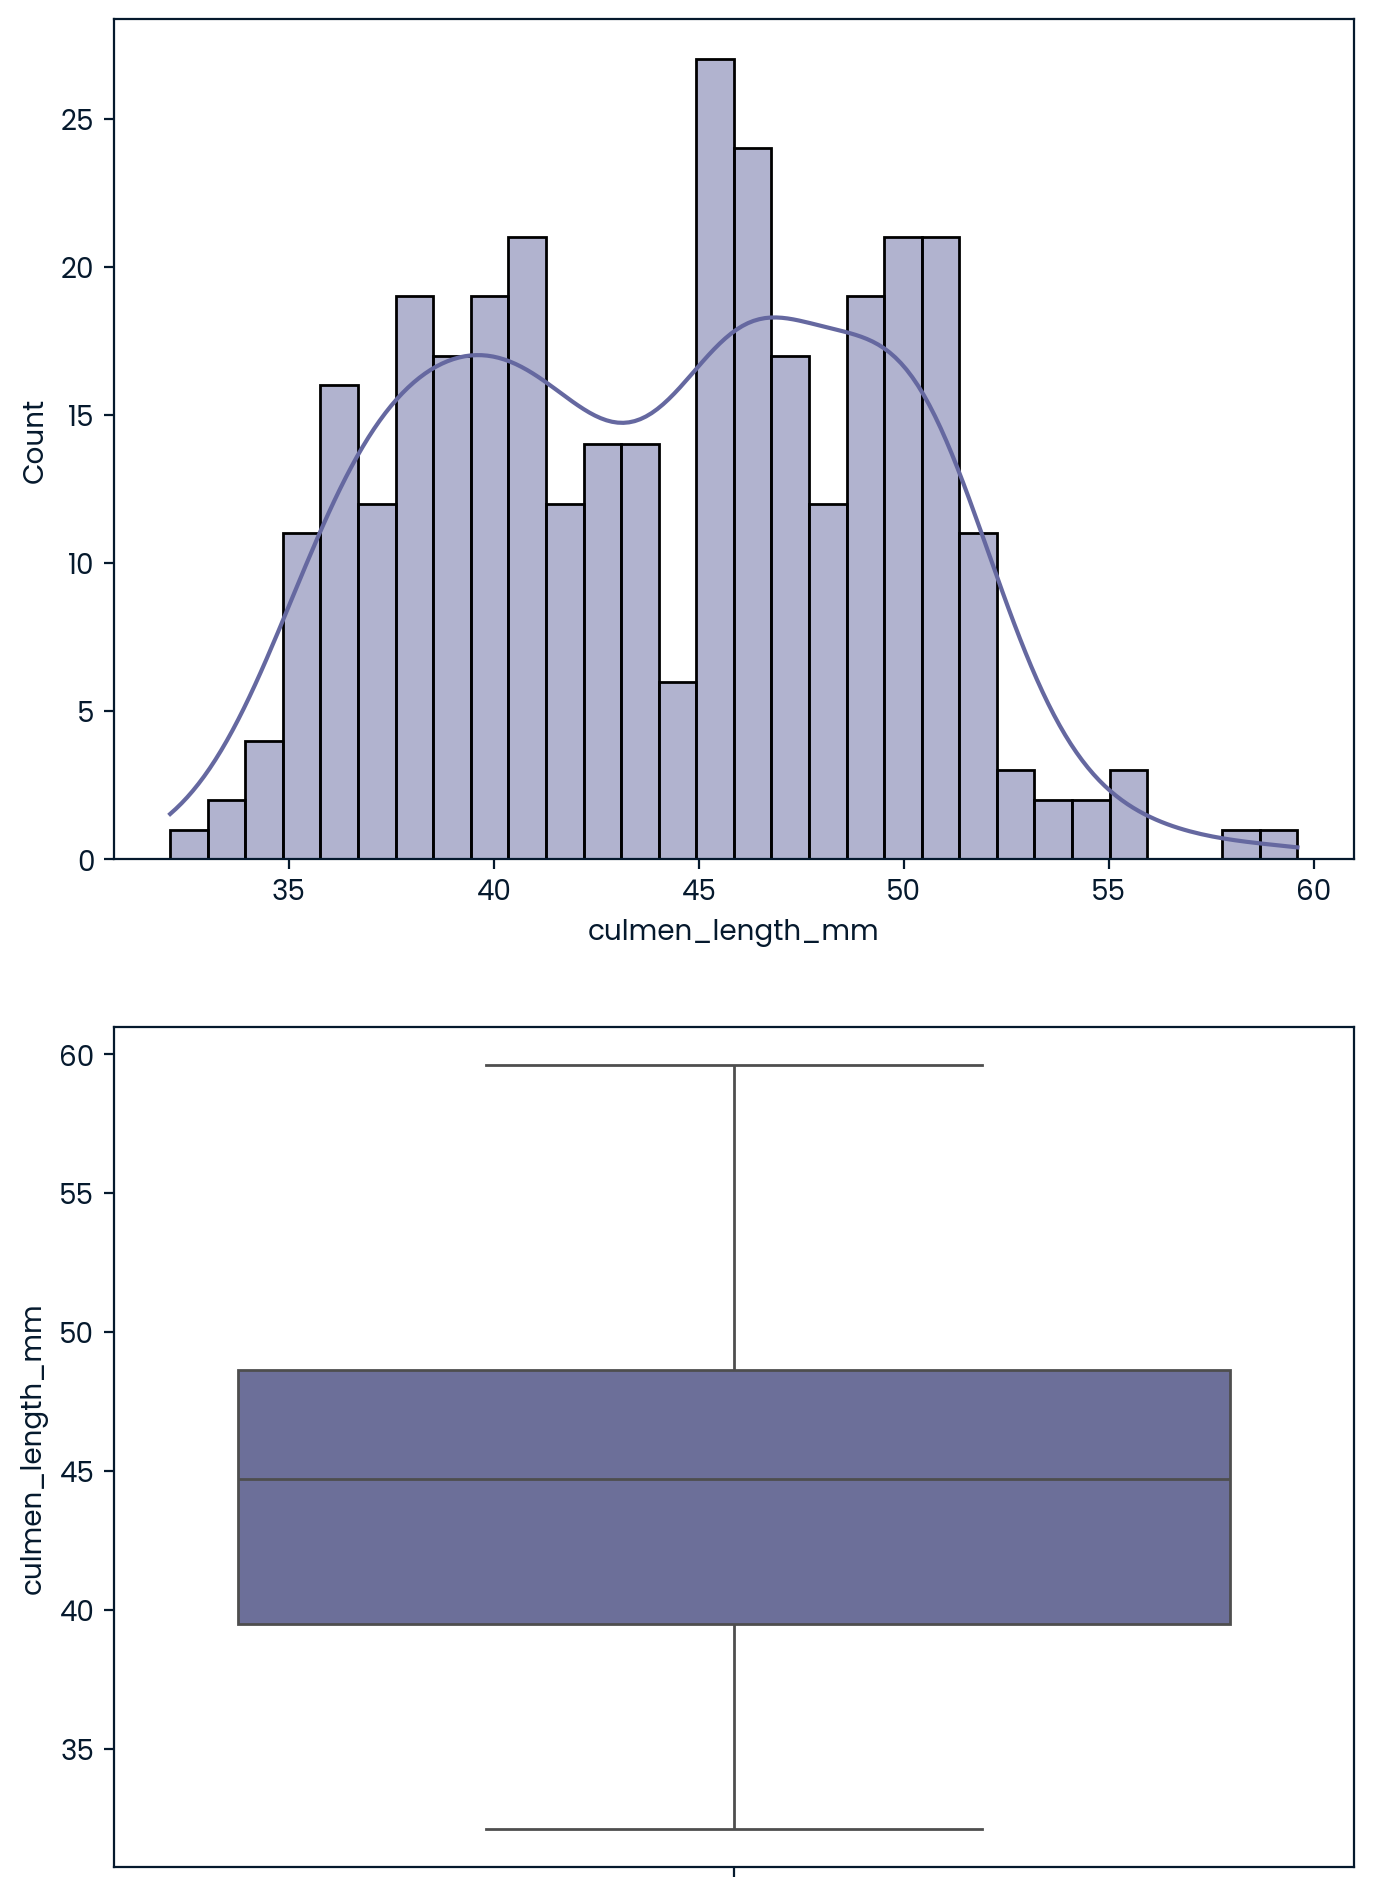

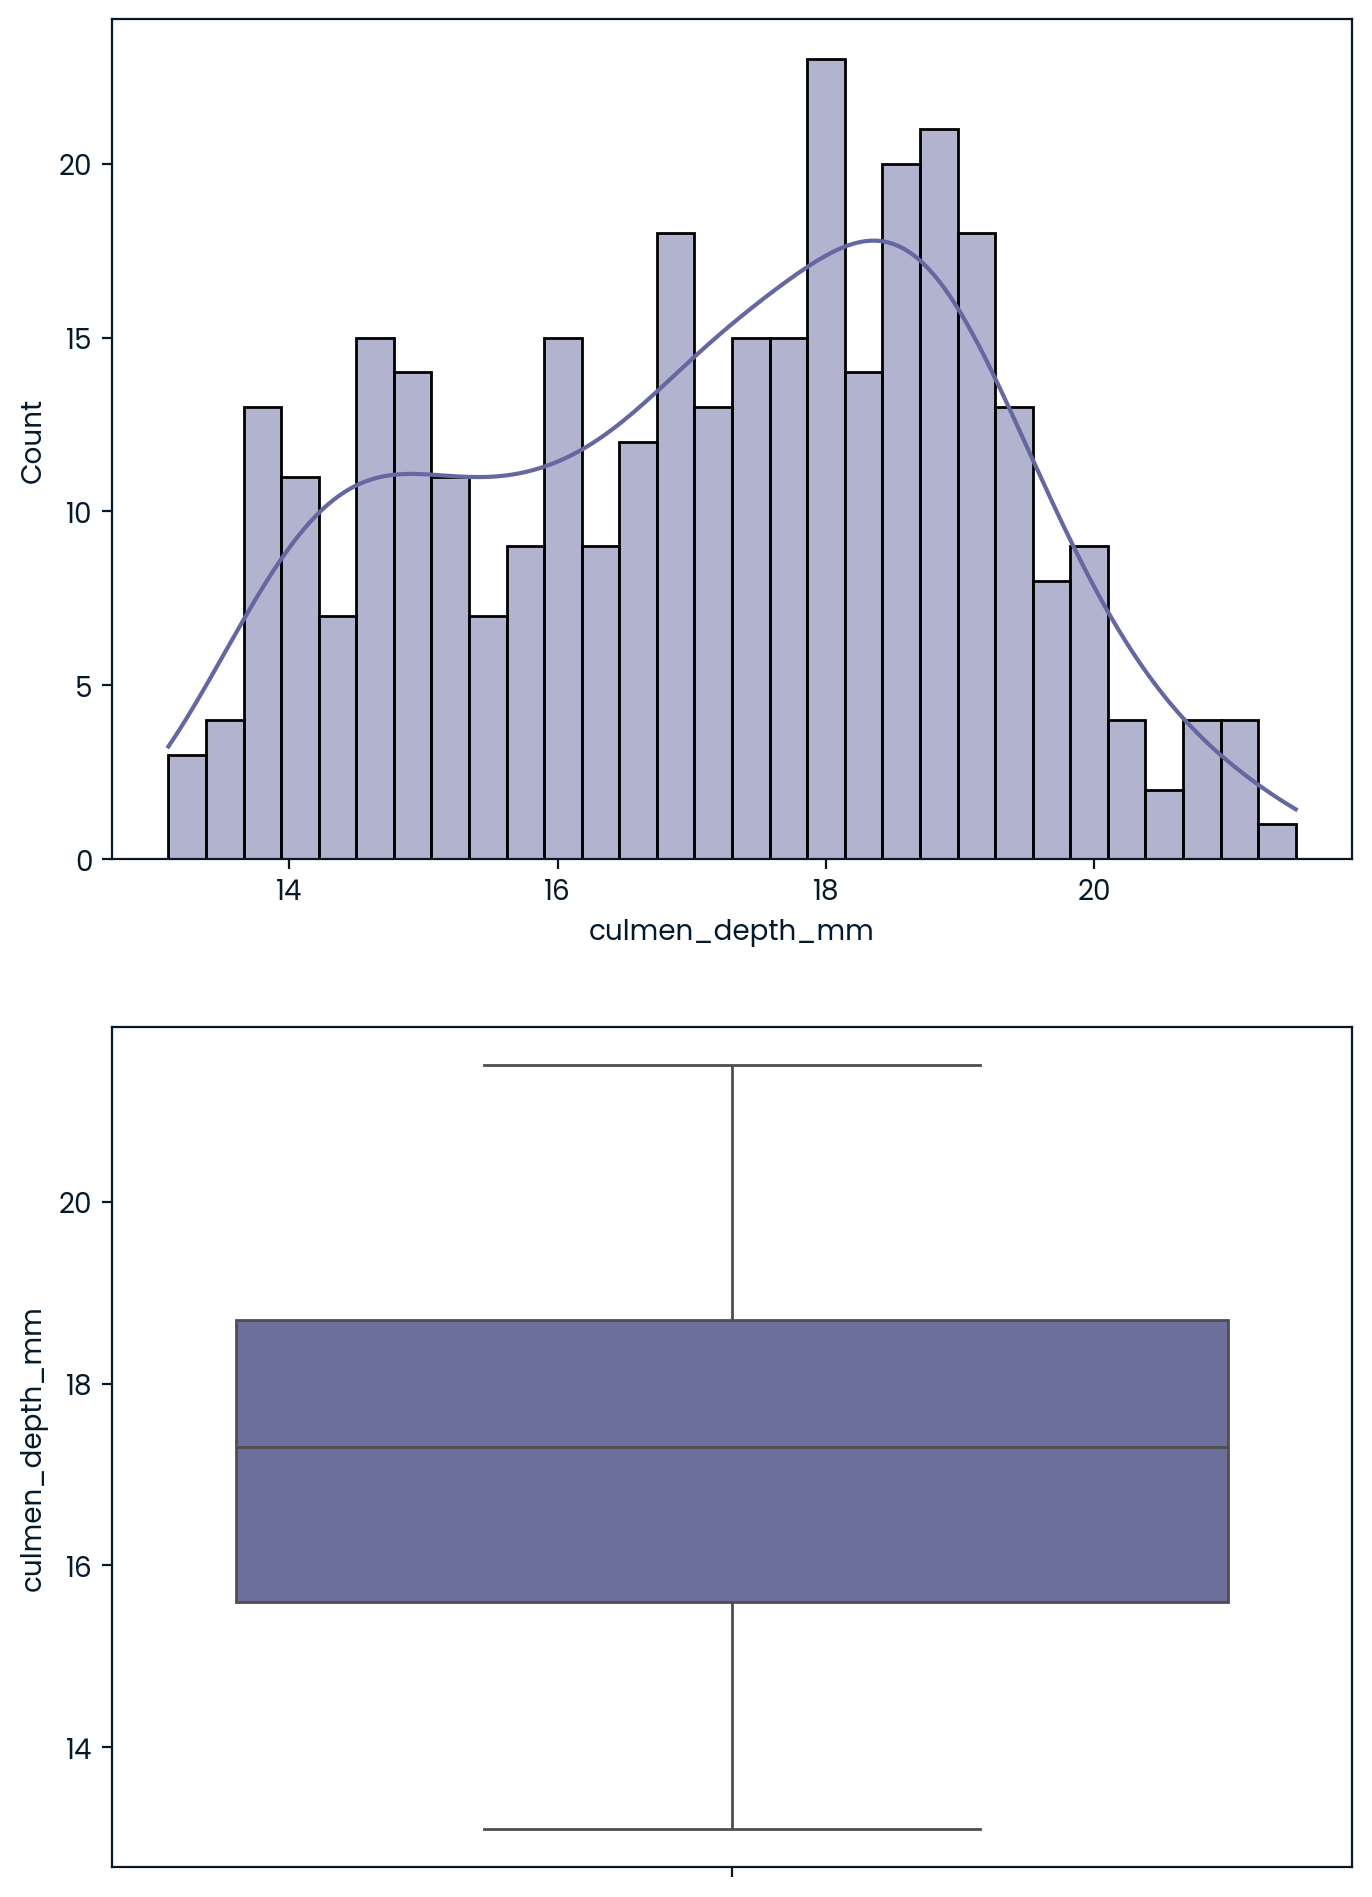

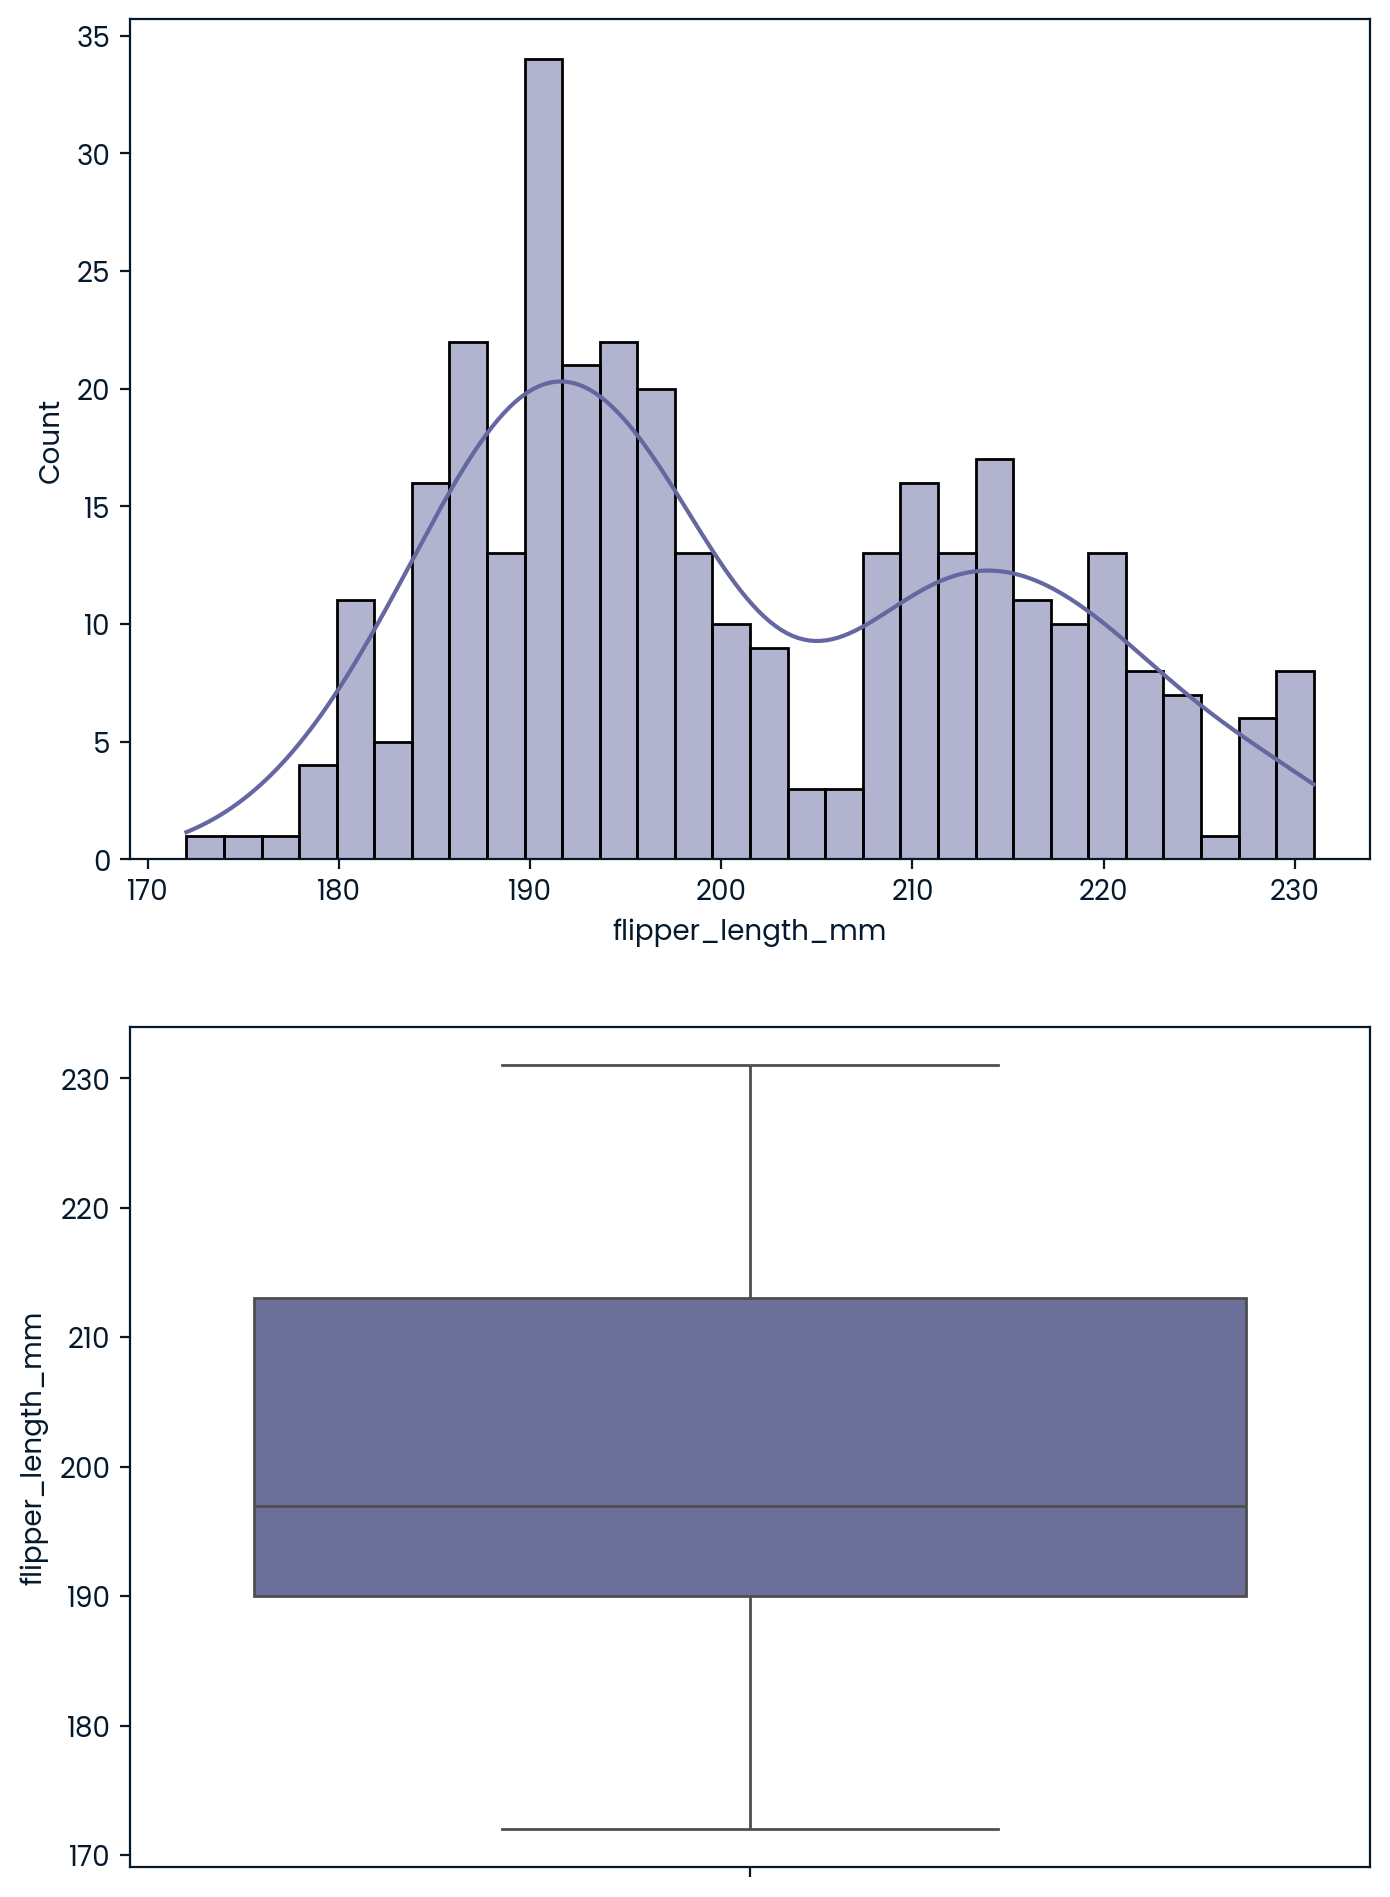

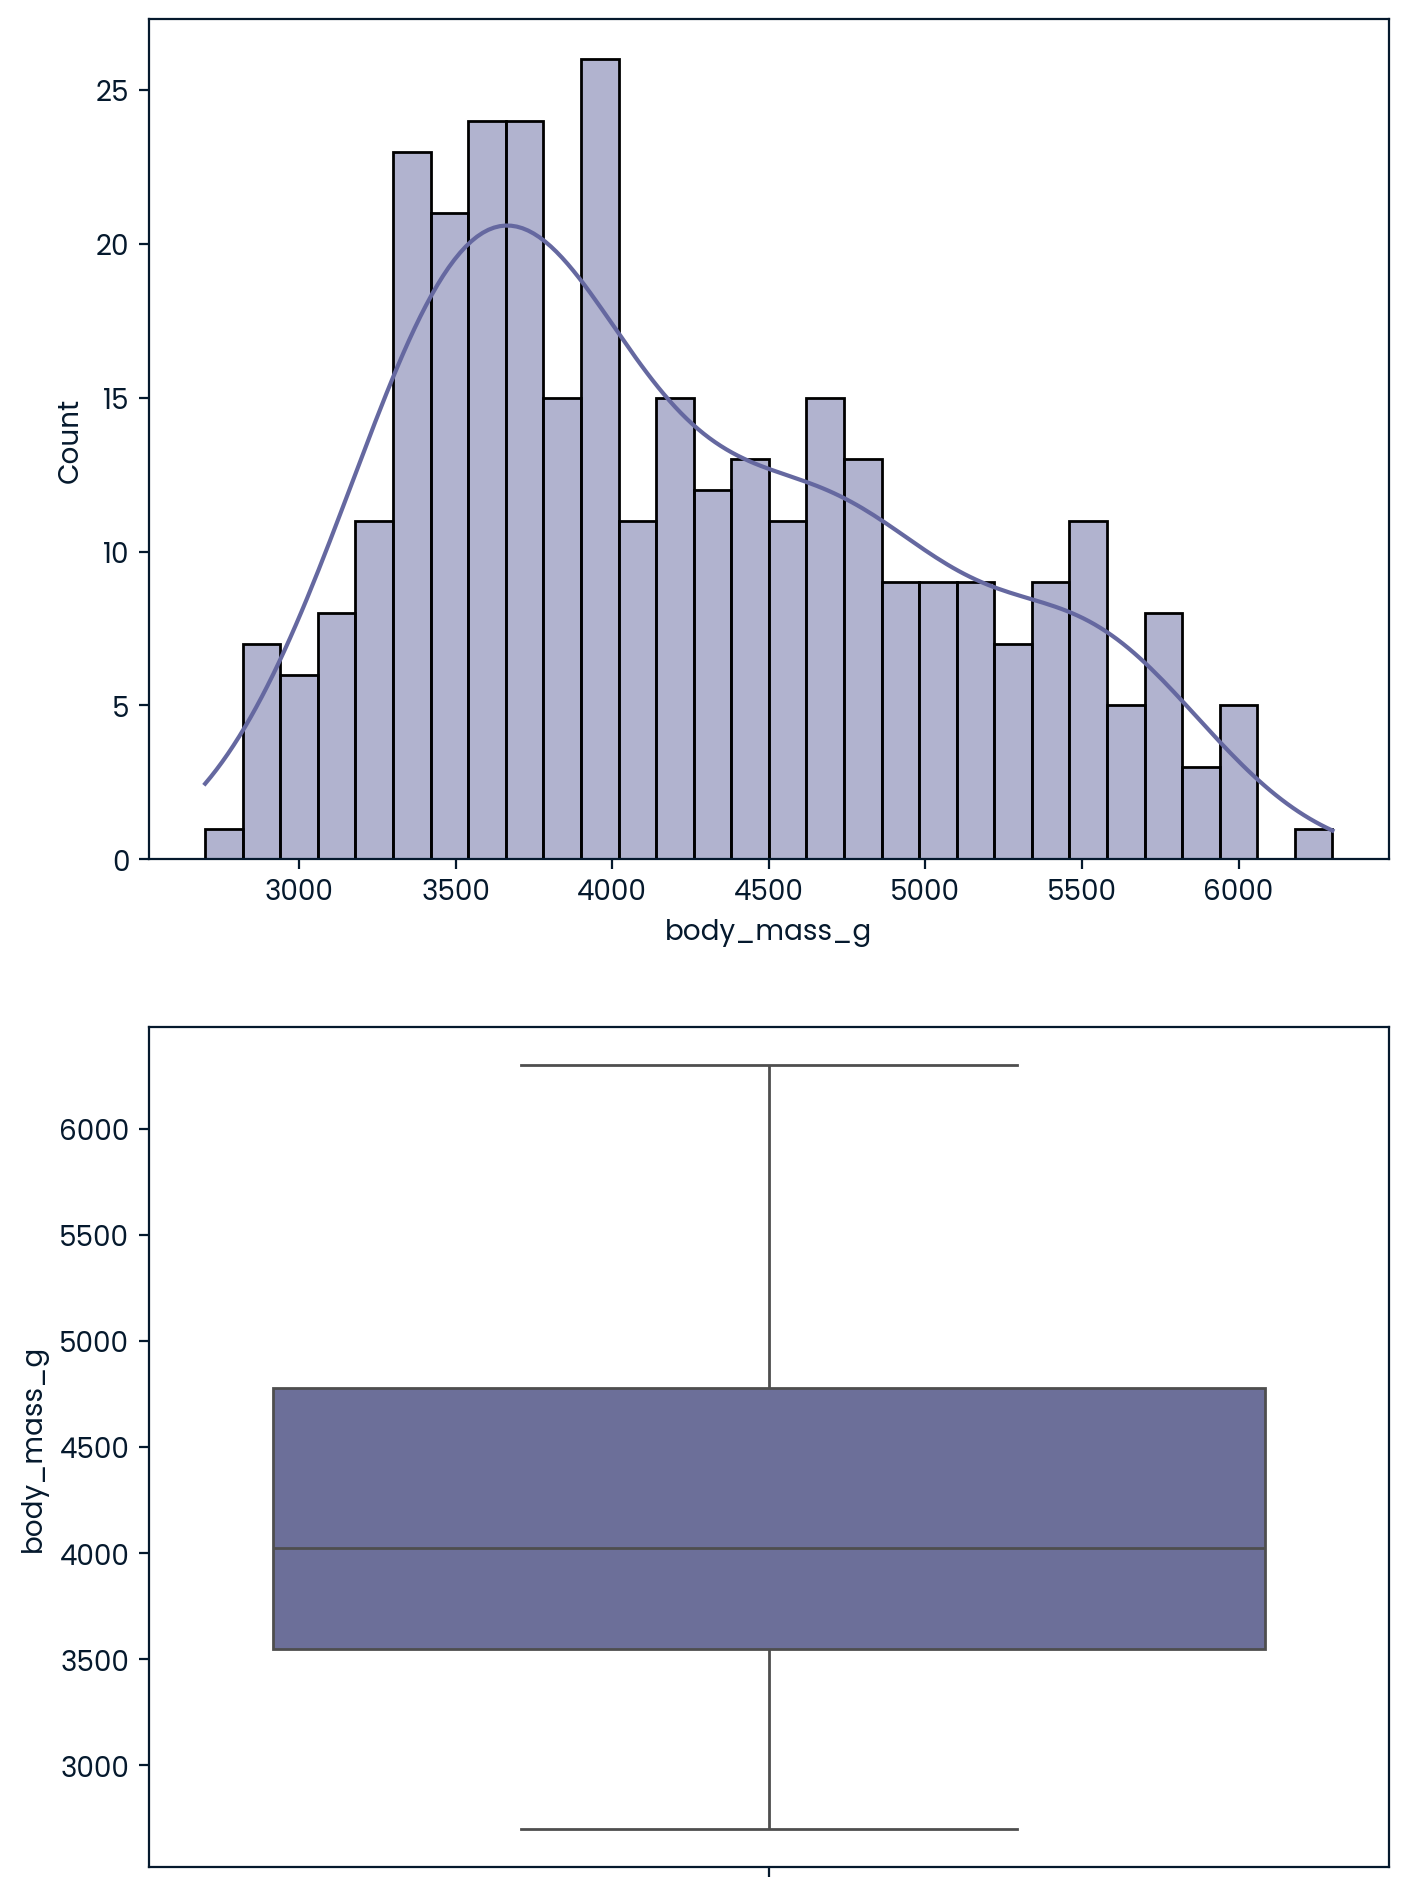

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical = penguins_df['sex']
numerical = penguins_df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]

for variable in numerical:
    fig, axes = plt.subplots(2, 1, figsize=(8, 12))
    sns.histplot(penguins_df[variable], bins=30, kde=True, ax=axes[0])
    sns.boxplot(penguins_df[variable], ax=axes[1])
    plt.show()
    


## Insights:
### Bimodal and Multimodal Distributions: The presence of bimodal and multimodal distributions in culmen length and flipper length suggests that there might be distinct subgroups within the penguin population, possibly related to different species or genders.
### Symmetry and Skewness: The relatively symmetric distributions of culmen depth and the slight right-skewness in body mass indicate different underlying factors affecting these measurements. Body mass may be influenced by a variety of factors such as age, diet, and health.
### Outliers: The presence of outliers in flipper length and body mass suggests that there are some individuals with significantly different measurements from the majority, which could be due to natural variation, measurement errors, or unique individual characteristics.

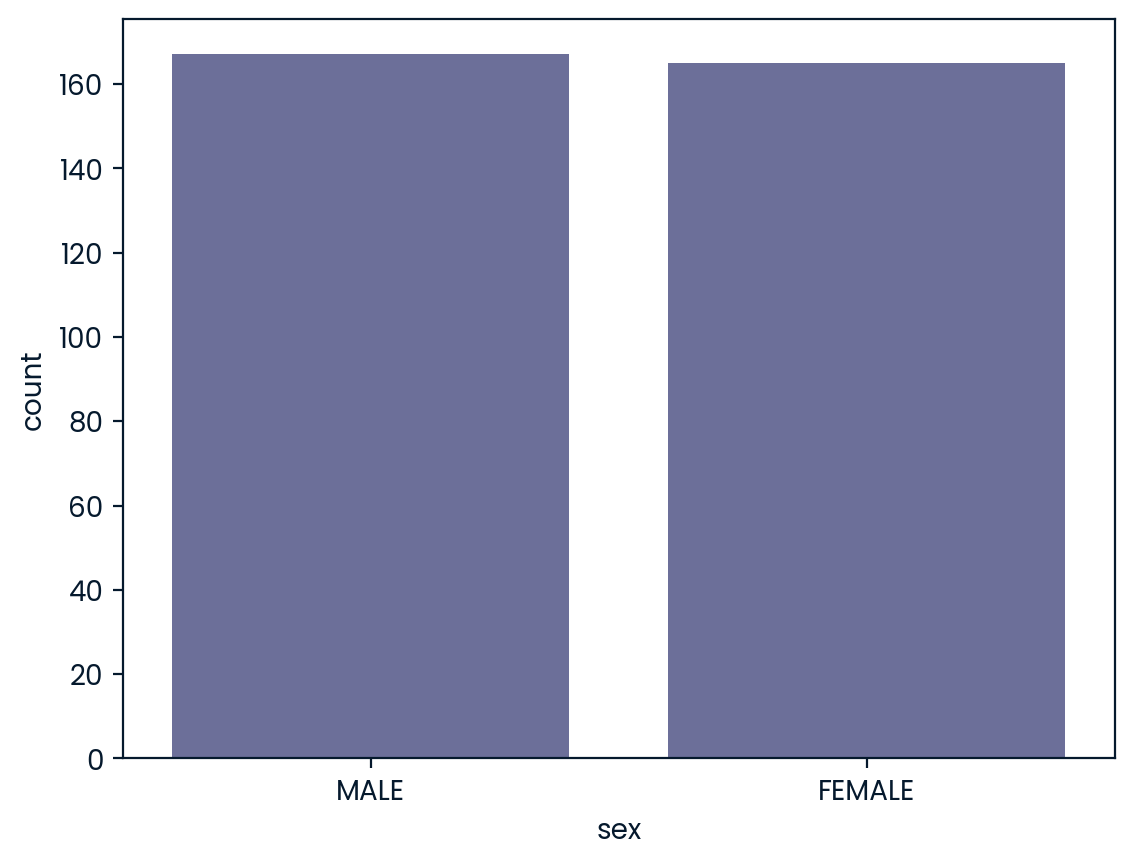

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=categorical)
plt.show()

### Even amounts in each gender.

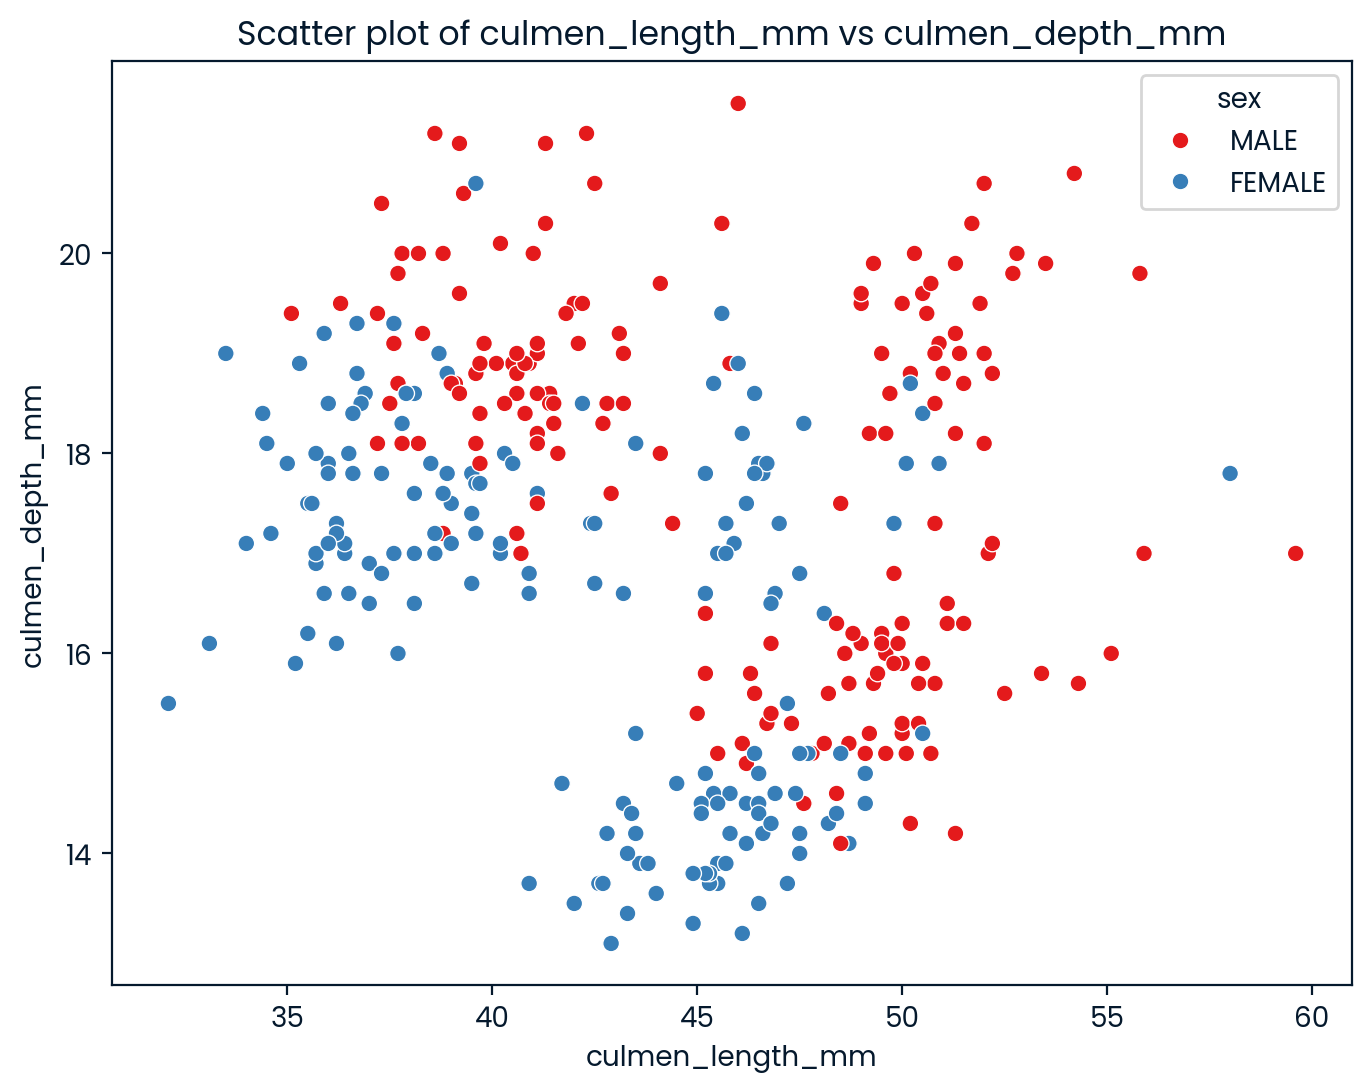

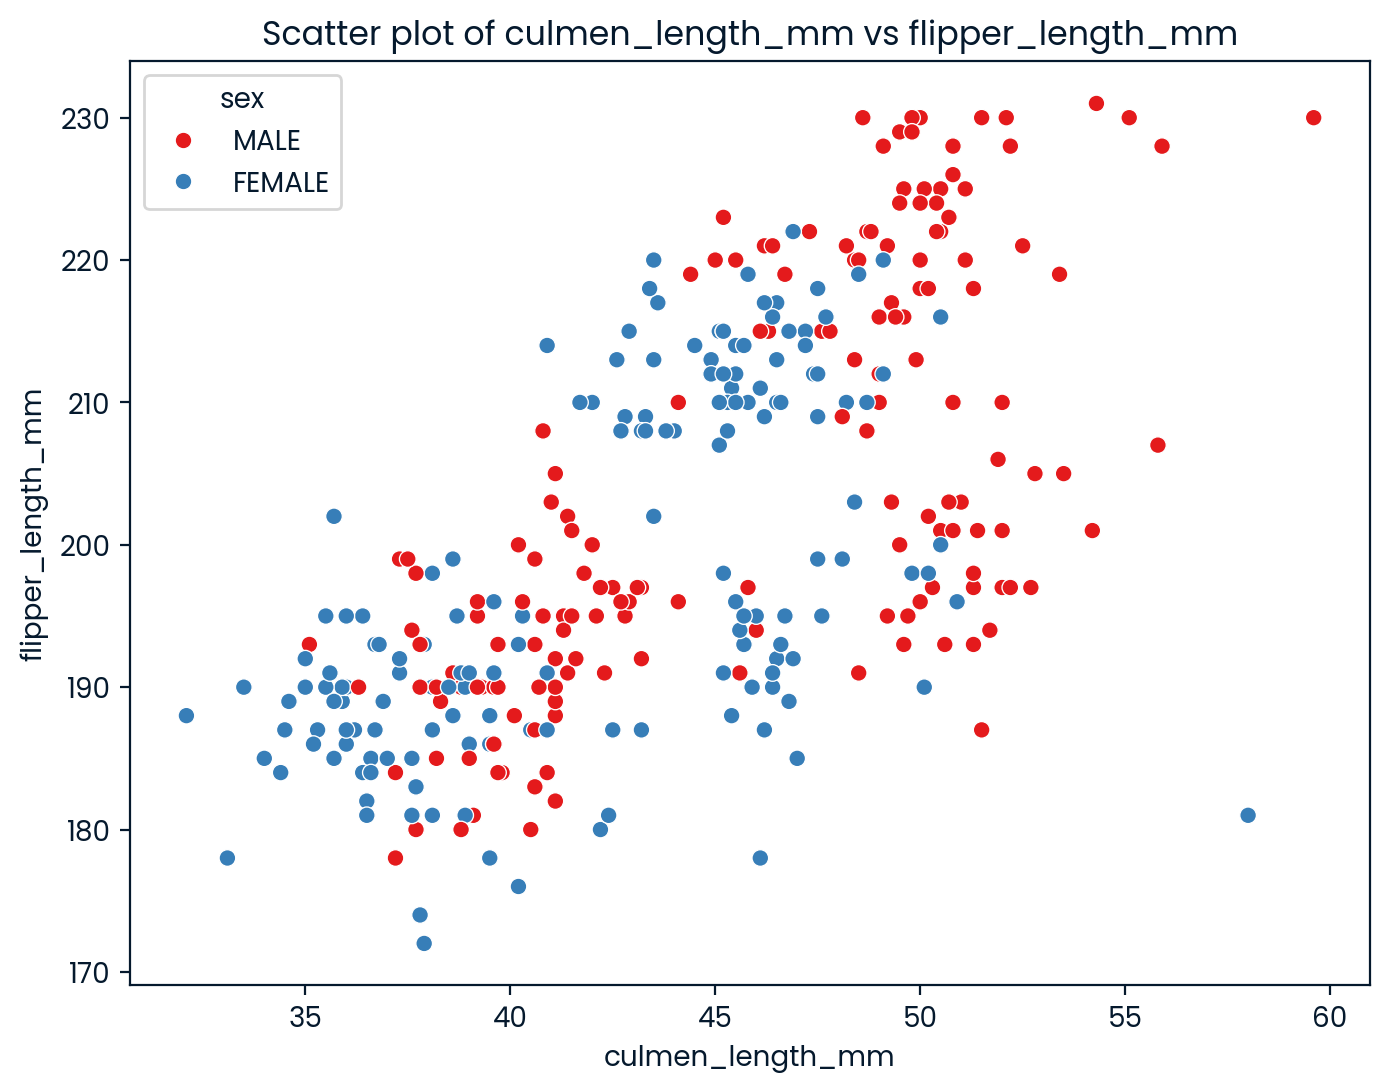

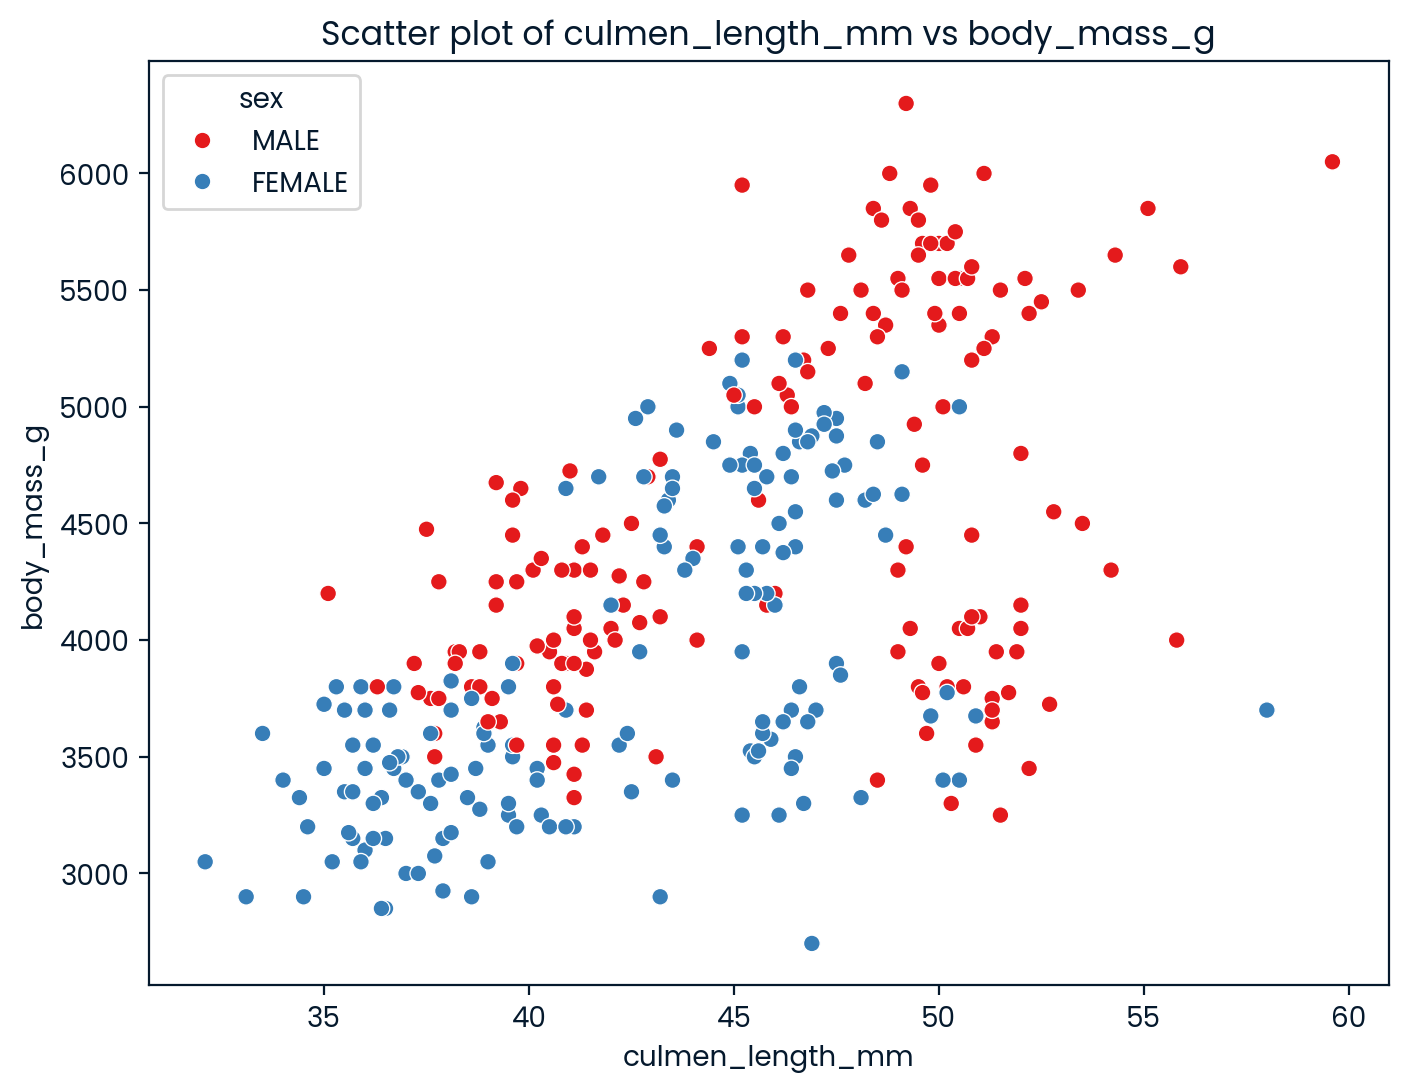

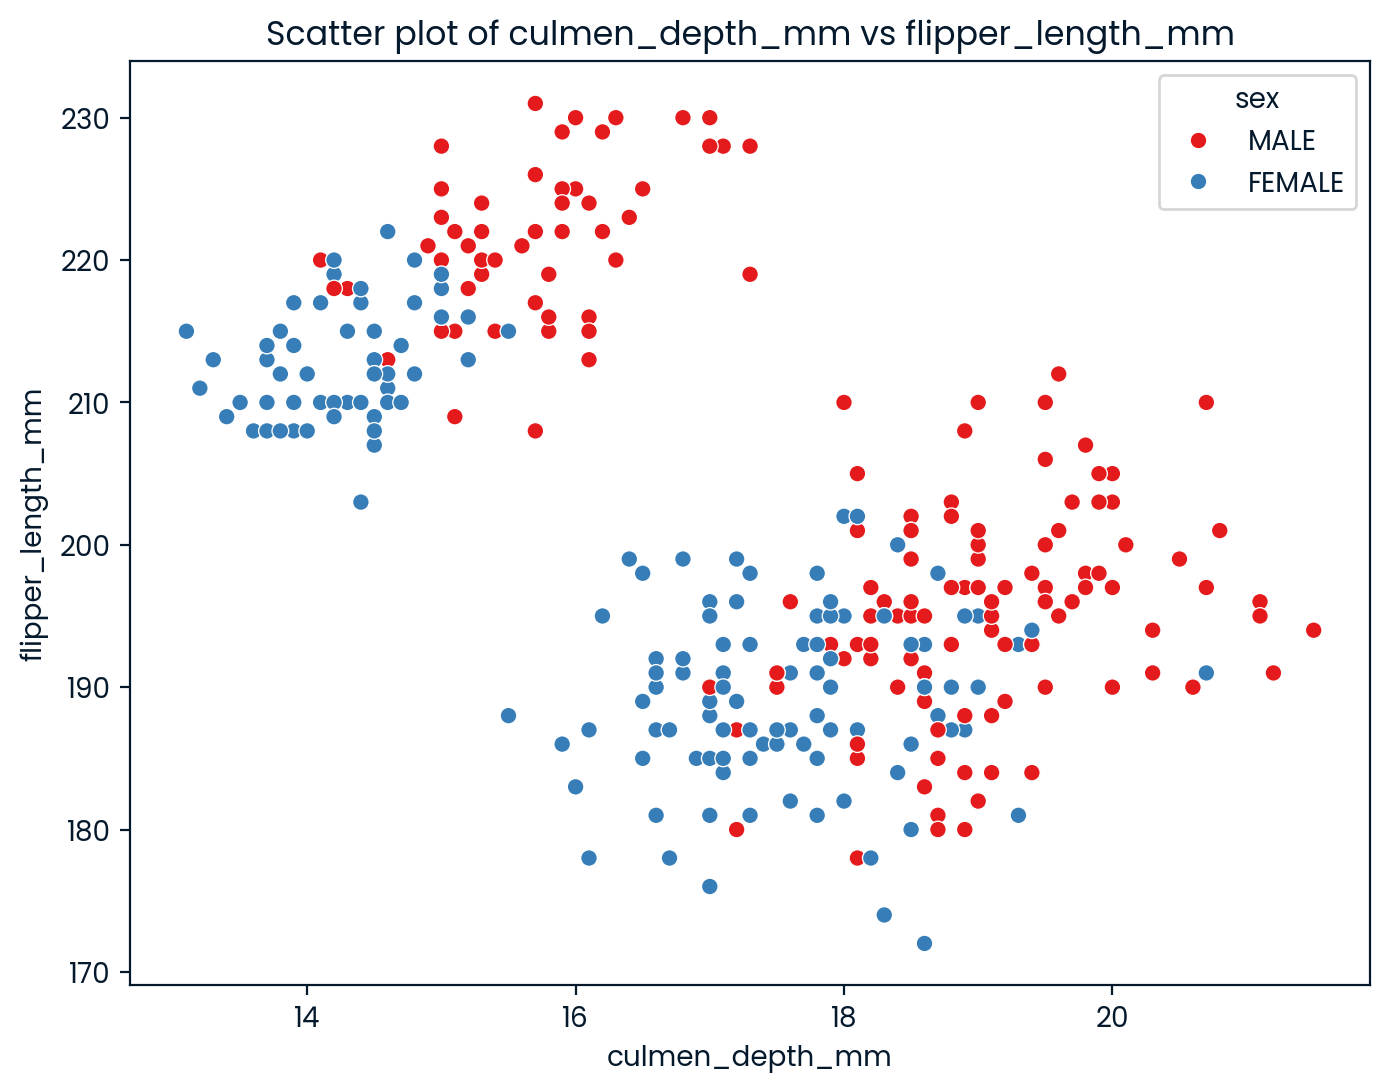

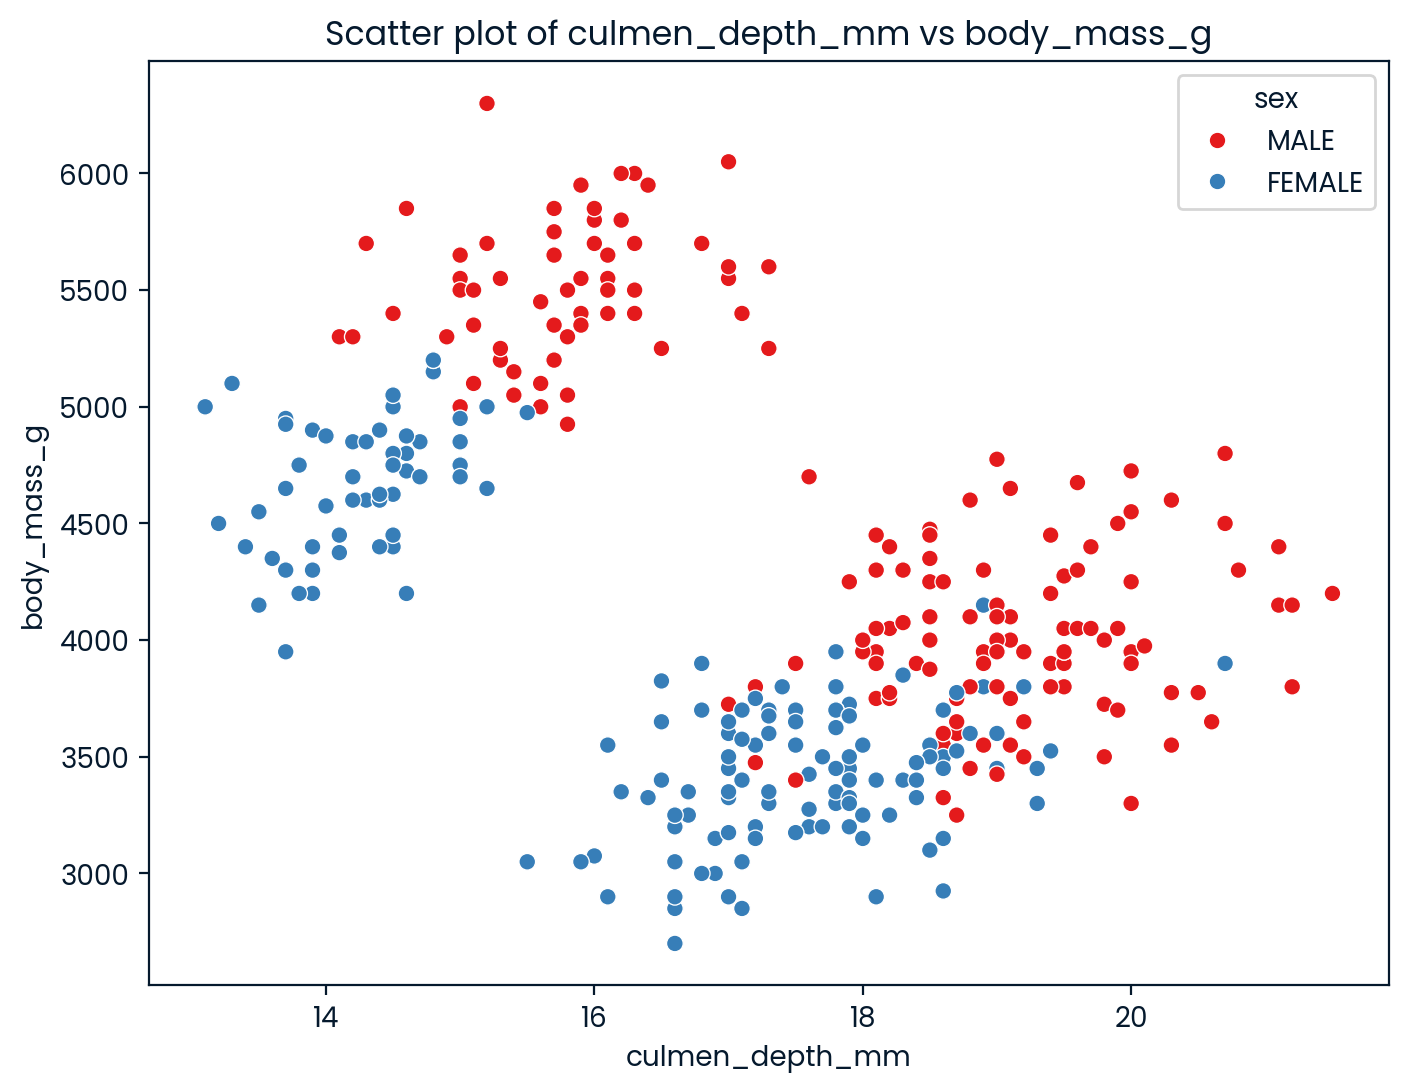

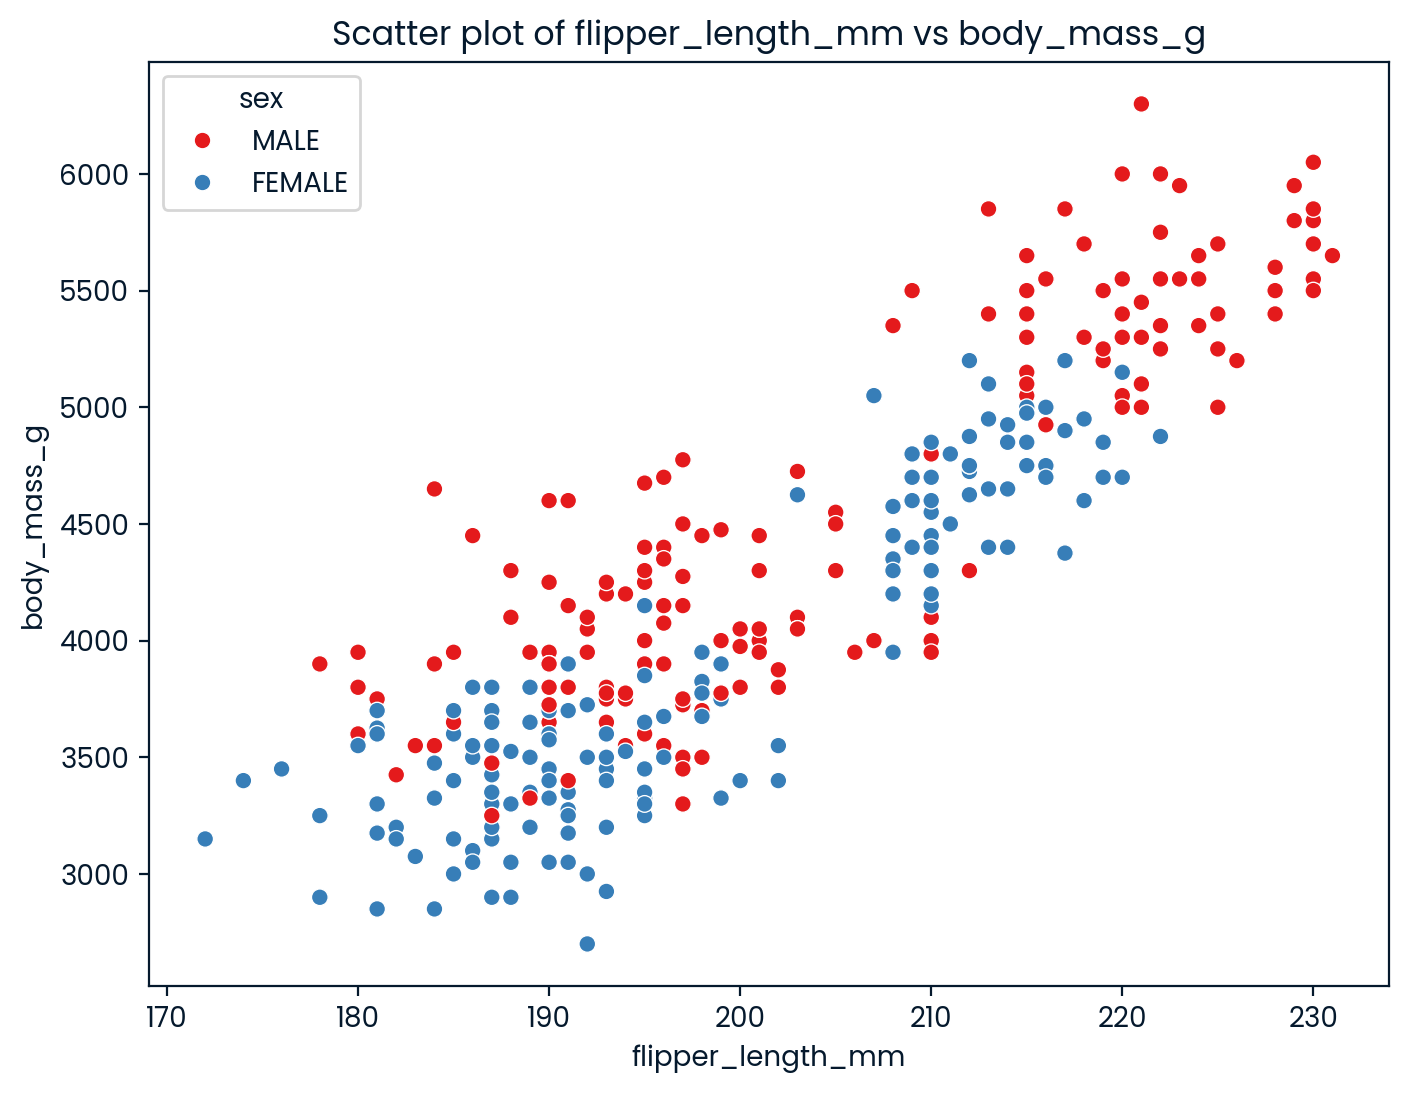

In [34]:
for i, var1 in enumerate(numerical):
    for j, var2 in enumerate(numerical):
        if i < j:
            plt.figure(figsize=(8, 6))
            sns.scatterplot(data=numerical, x=var1, y=var2, hue=categorical, palette='Set1')
            plt.title(f'Scatter plot of {var1} vs {var2}')
            plt.show()

### Gender Differences: Males generally have larger measurements than females across most dimensions, which is evident in the scatter plots.

### Correlations: Positive correlations are observed between:
#### Culmen Length and Flipper Length
#### Culmen Length and Body Mass
#### Culmen Depth and Body Mass
#### Flipper Length and Body Mass

### These relationships suggest that as the size of one body part increases, others tend to increase as well.

In [35]:
from scipy.stats import zscore

# Ensure 'numerical' is defined before using it
numerical = penguins_df.select_dtypes(include=['float64', 'int64']).columns

z_scores = penguins_df[numerical].apply(zscore)
outliers = (z_scores.abs() > 3).any(axis=1)

penguins_df = penguins_df[~outliers]

In [36]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
pca = PCA()

In [37]:
scaled_features = scaler.fit_transform(penguins_df.drop(columns='sex'))
pca_components = pca.fit(scaled_features)
components = range(pca_components.n_components_)

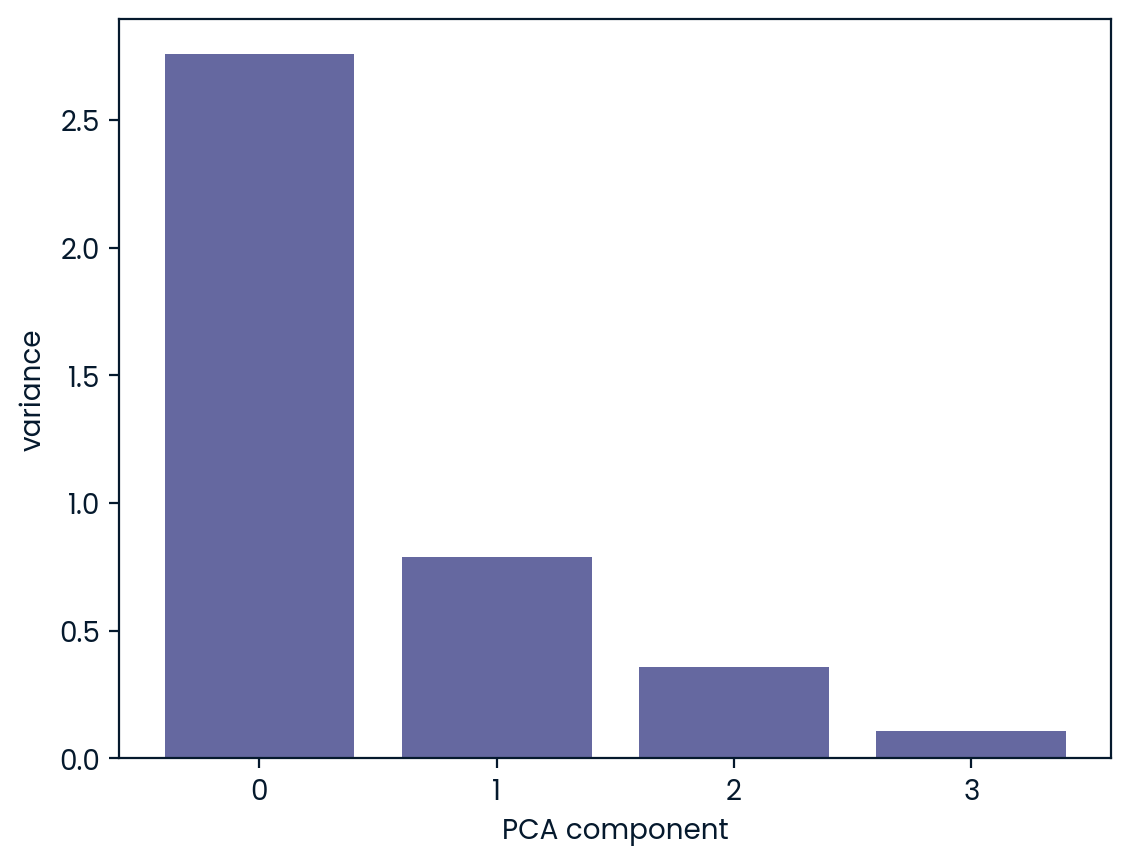

In [38]:
plt.bar(components, pca_components.explained_variance_)
plt.xticks(components)
plt.ylabel('variance')
plt.xlabel('PCA component')
plt.show()

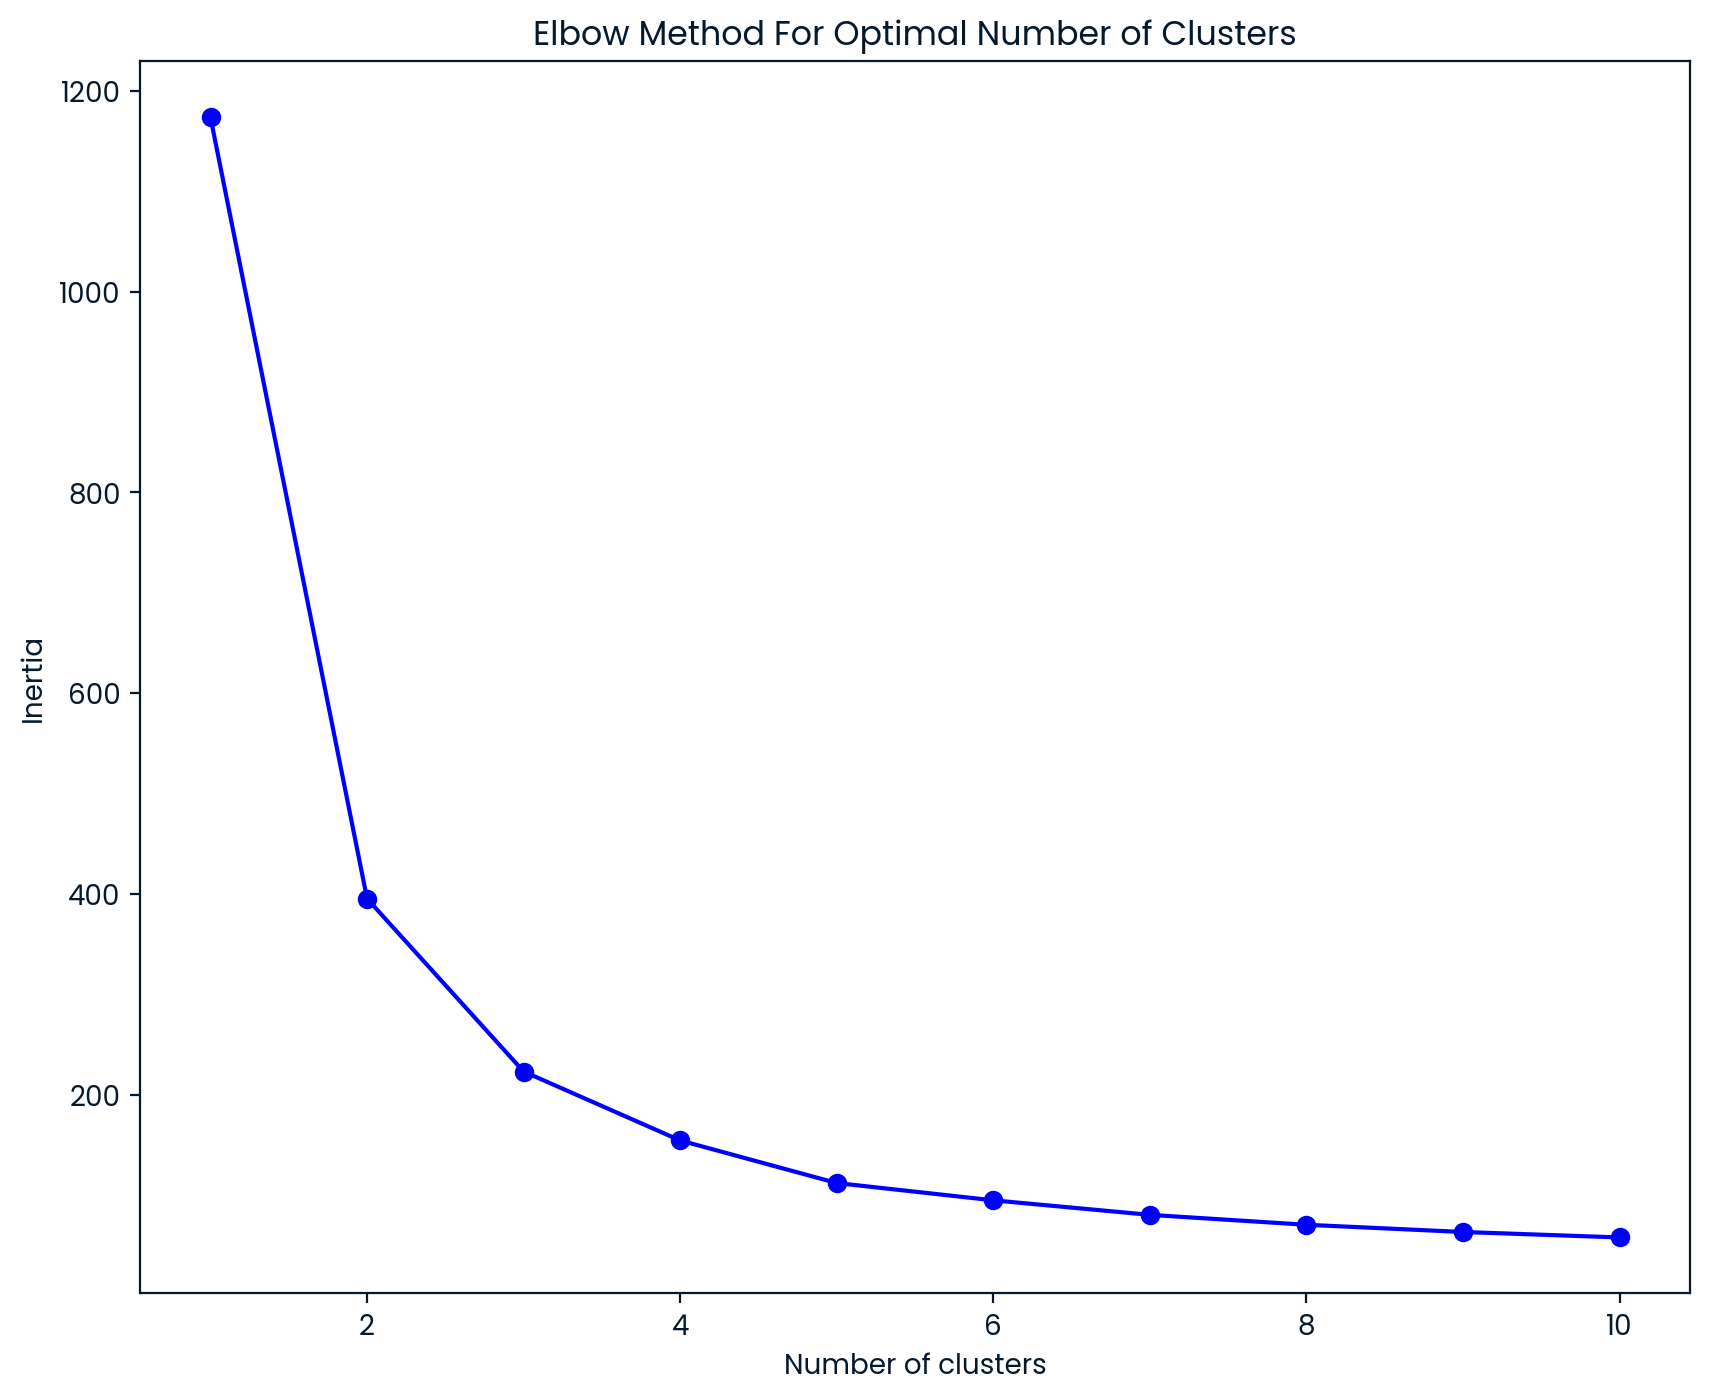

In [39]:
ideal_num_pca_components = 2
pca_ideal = PCA(n_components=ideal_num_pca_components)
transformed_features = pca_ideal.fit_transform(scaled_features)

inertia=[]
ks = range(1, 11)
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(transformed_features)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 8))
plt.plot(ks, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

In [40]:
ideal_k = 3

from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
pca = PCA(n_components=ideal_num_pca_components)
kmeans = KMeans(n_clusters=ideal_k)

pipeline = make_pipeline(scaler, pca, kmeans)

pipeline.fit(penguins_df.drop(columns='sex'))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('kmeans', KMeans(n_clusters=3))])

In [41]:
penguins_df['cluster'] = pipeline.named_steps['kmeans'].labels_

stat_penguins = penguins_df.groupby('cluster').mean().reset_index()

stat_penguins


,cluster,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,0,38.333884,17.959504,187.917355,3529.132231
1,1,47.568067,14.996639,217.235294,5092.436975
2,2,46.913043,18.881522,197.119565,3951.358696


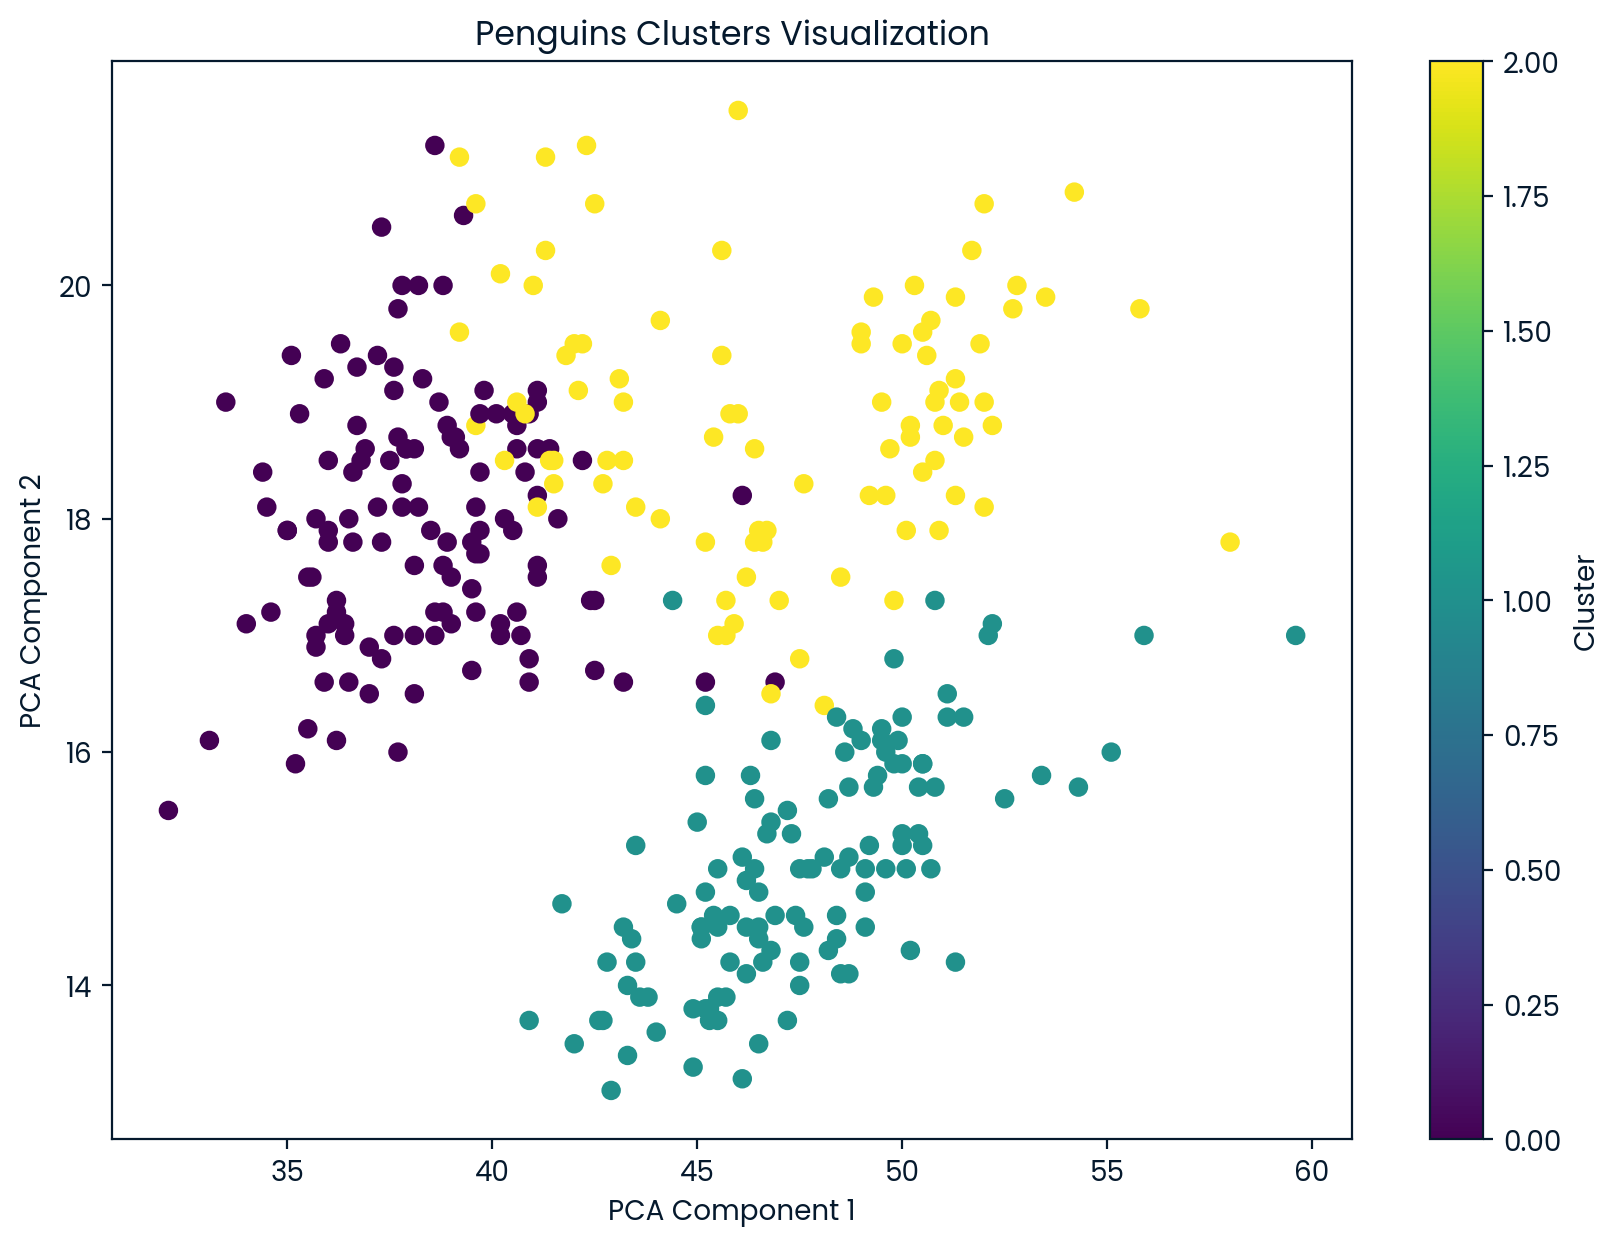

In [42]:
plt.figure(figsize=(10, 7))
plt.scatter(penguins_df.iloc[:, 0], penguins_df.iloc[:, 1], c=penguins_df['cluster'], cmap='viridis', marker='o')
plt.title('Penguins Clusters Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()